In [1]:
import numpy as np
import matplotlib.pyplot as plt

Took 848 steps
Initial point B:            [-23.9051707    7.48662728]
Final arrow B':             [-23.01451099   8.70991499]
Delta from B to B':        dx = 0.8907, dy = 1.2233


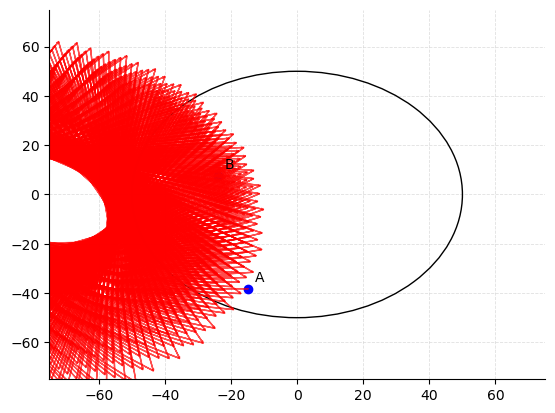

In [2]:
def random_point_in_circle(radius):
    r = radius * np.sqrt(np.random.rand())
    theta = 2 * np.pi * np.random.rand()
    return np.array([r * np.cos(theta), r * np.sin(theta)])

def greedy_rotating_path(A, B, initial_step, angle, tol_xy=(2.0, 2.0), max_iters=10000):
    A = A.astype(float)
    B = B.astype(float)
    path = [A.copy()]
    step = initial_step

    # horizontal offset
    dx = B[0] - A[0]
    # 1) initial move: east if B to the right, else west
    direction = np.array([1.0, 0.0]) if dx >= 0 else np.array([-1.0, 0.0])

    # vertical offset
    dy = B[1] - A[1]
    # product tells us which quadrant:
    #  dx*dy ≥ 0 → NE or SW  → CCW (positive)
    #  dx*dy <  0 → NW or SE  → CW  (negative)
    if dx * dy >= 0:
        angle_eff = angle
    else:
        angle_eff = -angle

    # rotation matrix with the chosen sign
    rot = np.array([
        [np.cos(angle_eff), -np.sin(angle_eff)],
        [np.sin(angle_eff),  np.cos(angle_eff)]
    ])

    # 3) greedy + rotating loop
    for _ in range(max_iters):
        candidate = path[-1] + step * direction

        # if it moved you closer, shrink the step
        if np.linalg.norm(candidate - B) < np.linalg.norm(path[-1] - B):
            step *= 0.999

        path.append(candidate)

        # check tolerances
        dx_c, dy_c = np.abs(candidate - B)
        if dx_c <= tol_xy[0] and dy_c <= tol_xy[1]:
            break

        # rotate for next iteration
        direction = rot @ direction

    return direction, np.array(path), len(path) - 1



# Parameters
radius = 50.0
initial_step = 140.0
angle = 2*np.pi*(1 - 1/((1+np.sqrt(5))/2))
tol_xy = (2.0, 2.0)

# Generate points and path
A = random_point_in_circle(radius)
B = random_point_in_circle(radius)
direction, path, n_steps = greedy_rotating_path(A, B, initial_step, angle, tol_xy)
print(f"Took {n_steps} steps")

# Extract final arrow and deltas
start = path[-2]
end = path[-1]
dx, dy = end - B

# Print results
print(f"Initial point B:            {B}")
print(f"Final arrow B':             {end}")
print(f"Delta from B to B':        dx = {dx:.4f}, dy = {dy:.4f}")

# Plot for visual reference
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), radius, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.grid(True, linestyle='--', linewidth=0.6, color='lightgray', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot A, B
ax.scatter(*A, color='blue', label='A')
ax.scatter(*B, color='blue', label='B')
ax.annotate('A', A, textcoords='offset points', xytext=(5,5))
ax.annotate('B', B, textcoords='offset points', xytext=(5,5))

# Plot path arrows
for s, e in zip(path[:-1], path[1:]):
    ax.arrow(s[0], s[1], e[0]-s[0], e[1]-s[1],
             head_width=0.5, head_length=0.8, length_includes_head=True,
             color='red', alpha=0.7)


# draw just the first 3 arrows
# for start, end in zip(path[:10], path[1:11]):                 # si queres ver el circuito entero, sacale el hashtag al for loop the arriba que dice plot path arrows y ponele hashtag al for loop este (toma mucho mas tiempo en cargar)
#     ax.arrow(
#         start[0], start[1],
#         end[0] - start[0], end[1] - start[1],
#         head_width=0.5,
#         head_length=0.8,
#         length_includes_head=True,
#         color='red',
#         alpha=0.7
#     )


ax.set_aspect('auto', 'box')
lim = radius * 1.5
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
plt.show()